<a href="https://colab.research.google.com/github/sushmasri4234/Internship/blob/main/StockPriceTrendPrediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288586
2015-01-05,23.604330
2015-01-06,23.606554
2015-01-07,23.937576
2015-01-08,24.857306


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X.shape, y.shape


((2455, 60, 1), (2455, 1))

In [5]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0219 - val_loss: 0.0014
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 8.8586e-04 - val_loss: 0.0036
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 8.9738e-04 - val_loss: 0.0019
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 8.2513e-04 - val_loss: 0.0011
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 7.9312e-04 - val_loss: 0.0012
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.8372e-04 - val_loss: 0.0010
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 8.1343e-04 - val_loss: 0.0041
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 7.6008e-04 - val_loss: 0.0022
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


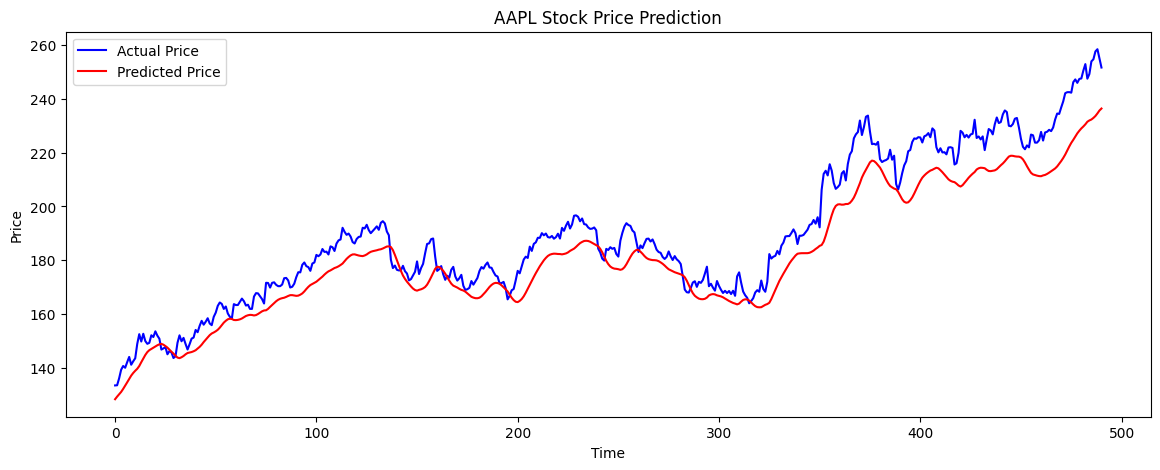

In [7]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


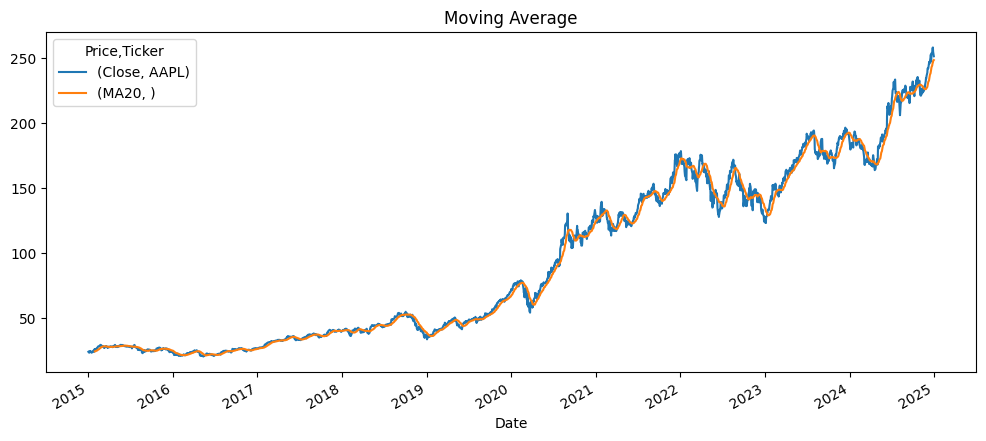

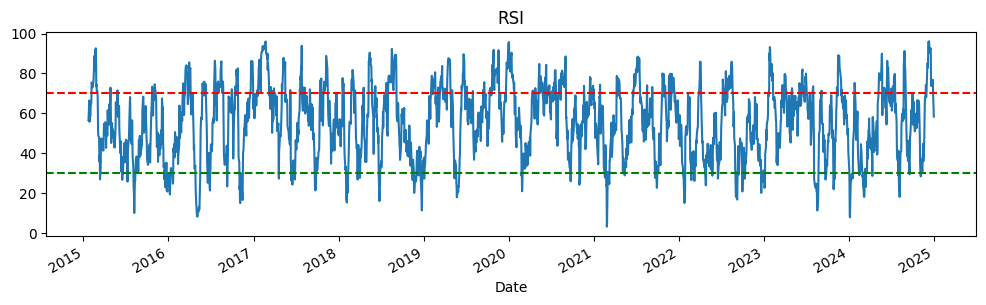

In [8]:
data['MA20'] = data['Close'].rolling(window=20).mean()

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = compute_rsi(data['Close'])

data[['Close', 'MA20']].plot(figsize=(12, 5), title='Moving Average')
plt.show()

data['RSI'].plot(figsize=(12, 3), title='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.show()
